## DATA 606 Capstone in Data Science
### Project Title: Lung Cancer Detection
### Author: Swapan Gupta Chollati(RJ29255)

- Dataset is downloaded from: https://www.kaggle.com/code/sripadkarthik/lung-cancer-prediction-using-ml-and-dl/data and uploaded to Github repository in a folder "data" created for the project. 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
import random
import tensorflow as tf

## Reading CSV File

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/SwapanGupt/SwapanGupta_Data606/main/data/LungCancer%20Dataset.csv")

In [ ]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Describing Shape of Data

In [ ]:
rows=data.shape[0]
print("Number of Rows in the Dataset are:",rows)

Number of Rows in the Dataset are: 1000


In [ ]:
columns=data.shape[1]
print("Number of Columns in the Dataset are:",columns)

Number of Columns in the Dataset are: 26


## Describing the Columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
X= data.iloc[:,2:-1]
y = data.iloc[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3,random_state=10)

## Label Distribution and EDA

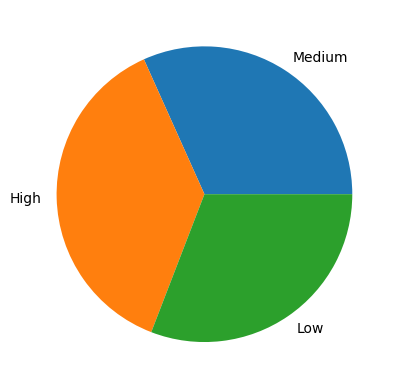

In [ ]:
l = train_y.unique()
cts = [train_y.tolist().count(i) for i in l] 
plt.pie(cts, labels = l)
plt.show()

Here, the data is almost equally distriuted, This is good for using classification models.

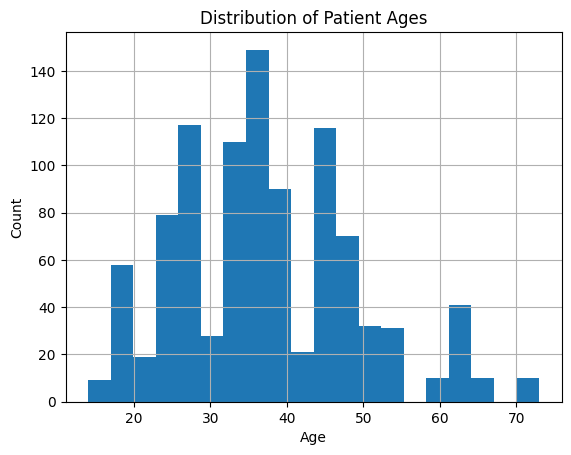

In [ ]:
data['Age'].hist(bins=20)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
  
train_x_scaled = sc.fit_transform(train_x)


In [ ]:
pca = PCA(n_components = 2)
  
train_x_reduced = pca.fit_transform(train_x_scaled)

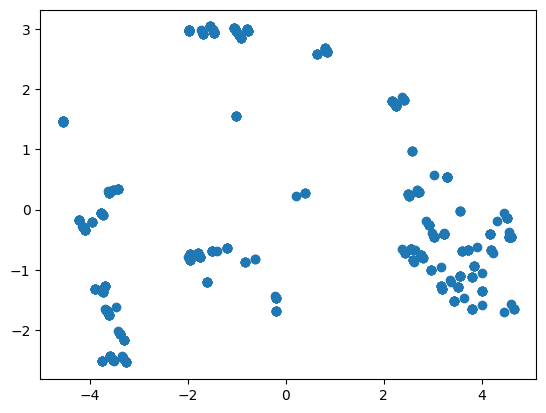

In [ ]:
plt.scatter(train_x_reduced[:,0], train_x_reduced[:,1])

After PCA, we see that the patients are clearly divided into groups.
Let su color the patients and checkout the distriution 

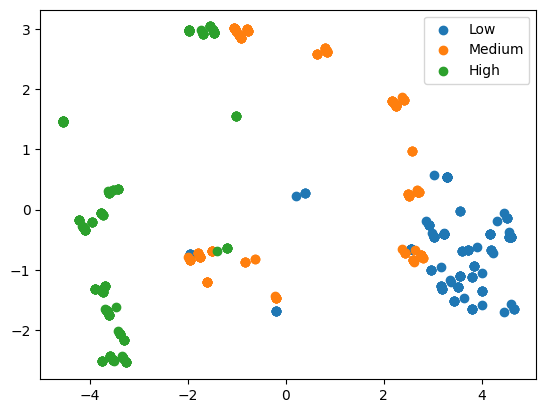

In [ ]:
plt.scatter(train_x_reduced[train_y== 'Low',0], train_x_reduced[train_y== 'Low',1])
plt.scatter(train_x_reduced[train_y== 'Medium',0], train_x_reduced[train_y== 'Medium',1])
plt.scatter(train_x_reduced[train_y== 'High',0], train_x_reduced[train_y== 'High',1])
plt.legend(['Low', 'Medium', 'High'])
plt.show()

Here, we can see how the patients are distriuted and also notice the decision boundary. Some medium and low risk patients are very near. However this could happen after using PCA which results in loss of information and hopefully we can achieve to set a good boundary after apply ML models on more than 2D level  

## Preprocessing

In [ ]:
train_x.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
742,23,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
676,48,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
571,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
99,29,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
78,46,2,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5


In [ ]:
#save the scalers for prediction purposes
scalers = {}
train_x_normalized = pd.DataFrame()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_normalizer = MinMaxScaler().fit(train_x)
train_x_normalized = data_normalizer.transform(train_x)
test_x_norm = data_normalizer.transform(test_x)

In [ ]:
train_x_normalized

array([[0.15254237, 0.        , 0.28571429, ..., 0.83333333, 0.66666667,
        0.5       ],
       [0.57627119, 0.        , 0.71428571, ..., 0.5       , 0.66666667,
        0.33333333],
       [0.05084746, 0.        , 0.28571429, ..., 0.        , 1.        ,
        0.16666667],
       ...,
       [0.38983051, 1.        , 0.71428571, ..., 0.33333333, 0.        ,
        0.5       ],
       [0.22033898, 1.        , 0.28571429, ..., 0.16666667, 0.83333333,
        0.16666667],
       [0.05084746, 1.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ]])

The y label should be vectorized. As there are 3 classes here, one hot encoding would be the perfect vectorizer to use

In [ ]:
train_y .head()

742    Medium
676      High
571    Medium
99       High
78     Medium
Name: Level, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_vectorizer = OneHotEncoder().fit(train_y.to_numpy().reshape(-1,1))

In [ ]:
y_vectorizer

OneHotEncoder()

In [ ]:
y_vectorized = y_vectorizer.transform(train_y.to_numpy().reshape(-1,1))
y_test_vect = y_vectorizer.transform(test_y.to_numpy().reshape(-1,1))

In [ ]:
y_vectorizer.get_feature_names_out()

array(['x0_High', 'x0_Low', 'x0_Medium'], dtype=object)

In [ ]:
y_vectorized = y_vectorized.todense()
y_test_vect = y_test_vect.todense()

In [ ]:
type(y_vectorized)

numpy.matrix

In [ ]:
train_x_normalized, y_vectorized = np.asarray(train_x_normalized), np.asarray(y_vectorized)

In [ ]:
test_x_norm,y_test_vect = np.asarray(test_x_norm), np.asarray(y_test_vect)

## Knn Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accs = []
for n_neighbors in range(1,15):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(train_x_normalized, y_vectorized)
  accuracy = knn.score(np.asarray(test_x_norm), np.asarray(y_test_vect))
  accs.append(accuracy)

Text(0, 0.5, 'Accuracy')

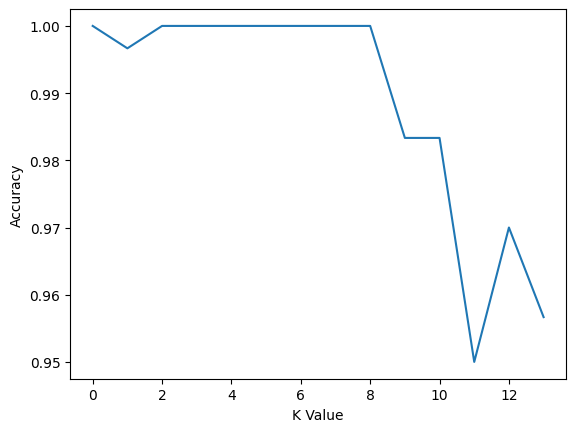

In [ ]:
plt.plot(range(len(accs)), accs)
plt.xlabel("K Value")
plt.ylabel("Accuracy")

We can see how accuracy increased until k is 3 and decreased after k is 7. Similar case was oserved with different proportions of testsets with different random states. So taking k as 5 which was the mean in many cases

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(train_x_normalized, y_vectorized)

[[197   0]
 [  0 103]]


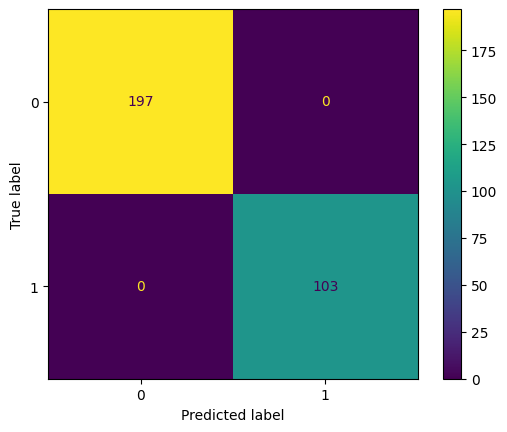

[[213   0]
 [  0  87]]


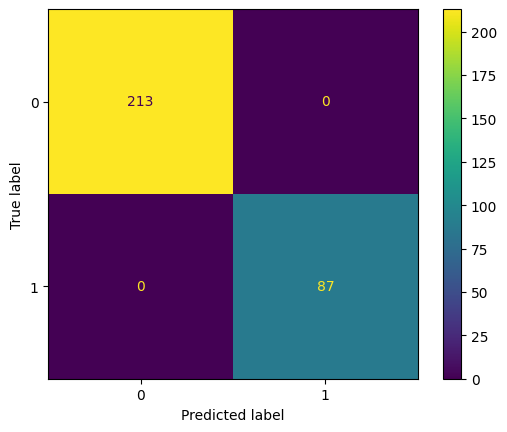

[[190   0]
 [  0 110]]


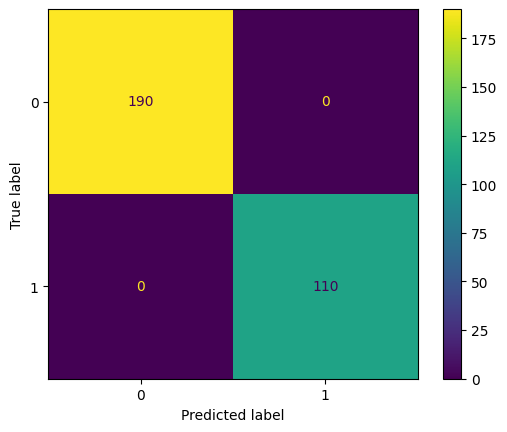

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(np.asarray(test_x_norm))
for i in range(3):
  print(confusion_matrix( np.asarray(y_test_vect[:,i]), y_pred[:,i]))
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix((y_test_vect[:,i]), y_pred[:,i]))
  disp.plot()
  plt.show()

In [ ]:
print(classification_report(y_test_vect, y_pred, target_names=['x0_High', 'x0_Low', 'x0_Medium']))

              precision    recall  f1-score   support

     x0_High       1.00      1.00      1.00       103
      x0_Low       1.00      1.00      1.00        87
   x0_Medium       1.00      1.00      1.00       110

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300
 samples avg       1.00      1.00      1.00       300



## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3).fit(train_x_normalized, y_vectorized)
y_pred = tree_model.predict(test_x_norm)

[[195   2]
 [  4  99]]


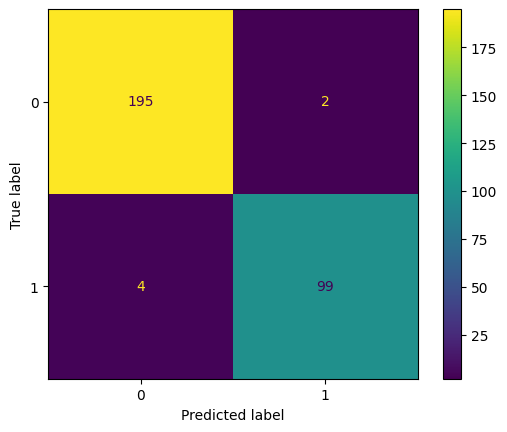

[[205   8]
 [  0  87]]


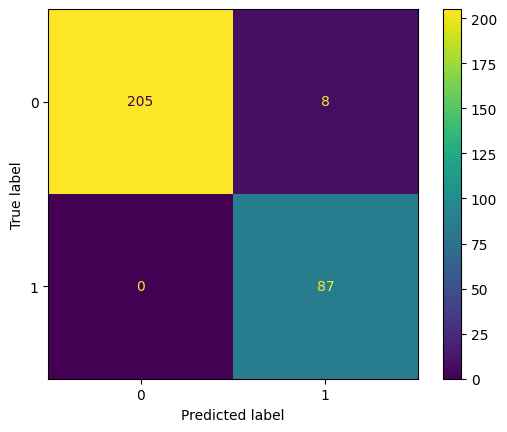

[[190   0]
 [  6 104]]


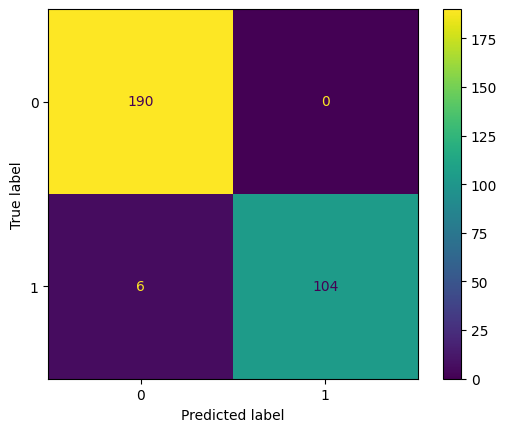

In [ ]:
for i in range(3):
  print(confusion_matrix(y_test_vect[:,i], y_pred[:,i]))
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test_vect[:,i], y_pred[:,i]))
  disp.plot()
  plt.show()

[Text(0.5555555555555556, 0.875, 'Coughing of Blood <= 0.562\ngini = 0.443\nsamples = 700\nvalue = [[438, 262]\n[484, 216]\n[478, 222]]'),
 Text(0.3333333333333333, 0.625, 'Wheezing <= 0.5\ngini = 0.343\nsamples = 401\nvalue = [[395, 6]\n[197, 204]\n[210, 191]]'),
 Text(0.2222222222222222, 0.375, 'Snoring <= 0.583\ngini = 0.224\nsamples = 257\nvalue = [[251, 6]\n[53, 204]\n[210, 47]]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.12\nsamples = 226\nvalue = [[220, 6]\n[22, 204]\n[210, 16]]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [[31, 0]\n[31, 0]\n[0, 31]]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 144\nvalue = [[144, 0]\n[144, 0]\n[0, 144]]'),
 Text(0.7777777777777778, 0.625, 'OccuPational Hazards <= 0.929\ngini = 0.17\nsamples = 299\nvalue = [[43, 256]\n[287, 12]\n[268, 31]]'),
 Text(0.6666666666666666, 0.375, 'Obesity <= 0.25\ngini = 0.091\nsamples = 276\nvalue = [[20, 256]\n[264, 12]\n[268, 8]]'),
 Text(0.5555555555555556, 0.125, 'gini =

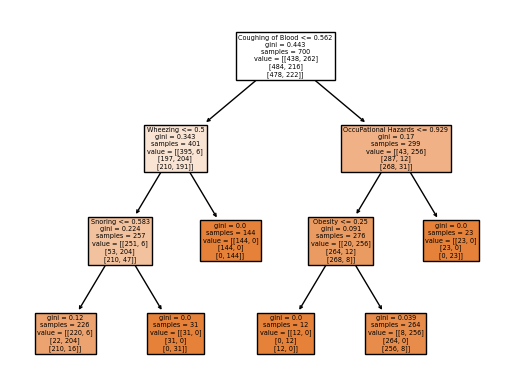

In [ ]:
from sklearn import tree
tree.plot_tree(tree_model, feature_names=data.columns[2:-1],  
                   class_names=['x0_High', 'x0_Low', 'x0_Medium'],
                   filled=True)

In [ ]:
print(classification_report(y_test_vect, y_pred, target_names=['x0_High', 'x0_Low', 'x0_Medium']))

              precision    recall  f1-score   support

     x0_High       0.98      0.96      0.97       103
      x0_Low       0.92      1.00      0.96        87
   x0_Medium       1.00      0.95      0.97       110

   micro avg       0.97      0.97      0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300
 samples avg       0.97      0.97      0.97       300



## Logistic Regression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def mk_model():
  model = Sequential()
  model.add(Dense(3,activation = 'sigmoid',input_dim = 23))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = mk_model()
hist = model.fit(train_x_normalized, y_vectorized, epochs=300, validation_data=(test_x_norm, y_test_vect))

Epoch 1/300
22/22 [==============================] - 2s 38ms/step - loss: 0.7398 - accuracy: 0.2414 - val_loss: 0.7197 - val_accuracy: 0.2933
Epoch 2/300
22/22 [==============================] - 0s 13ms/step - loss: 0.7077 - accuracy: 0.2857 - val_loss: 0.6929 - val_accuracy: 0.3233
Epoch 3/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6832 - accuracy: 0.3514 - val_loss: 0.6723 - val_accuracy: 0.4100
Epoch 4/300
22/22 [==============================] - 0s 13ms/step - loss: 0.6648 - accuracy: 0.4114 - val_loss: 0.6558 - val_accuracy: 0.4133
Epoch 5/300
22/22 [==============================] - 0s 9ms/step - loss: 0.6501 - accuracy: 0.4214 - val_loss: 0.6422 - val_accuracy: 0.4100
Epoch 6/300
22/22 [==============================] - 0s 20ms/step - loss: 0.6372 - accuracy: 0.4057 - val_loss: 0.6302 - val_accuracy: 0.4100
Epoch 7/300
22/22 [==============================] - 0s 14ms/step - loss: 0.6264 - accuracy: 0.4229 - val_loss: 0.6197 - val_accuracy: 0.4200
Epoch 8

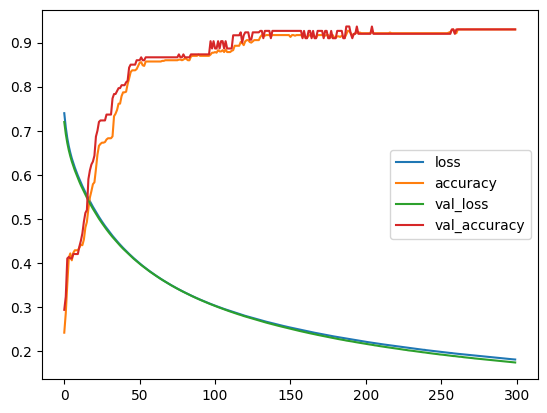

In [ ]:
for k in hist.history.keys():
  plt.plot(range(len(hist.history[k])),hist.history[k])
plt.legend(hist.history.keys())

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
y_pred = model.predict(test_x_norm) > 0.5

10/10 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [Fa

[[195   2]
 [  0 103]]


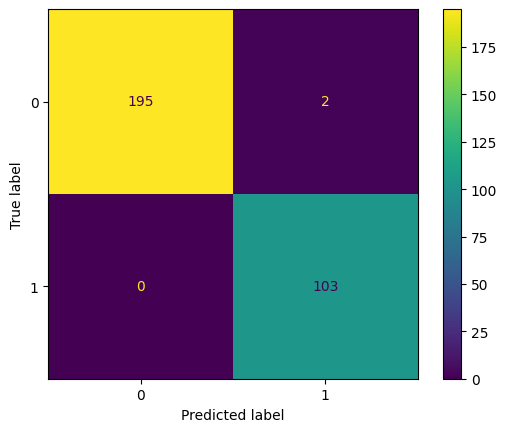

[[212   1]
 [ 15  72]]


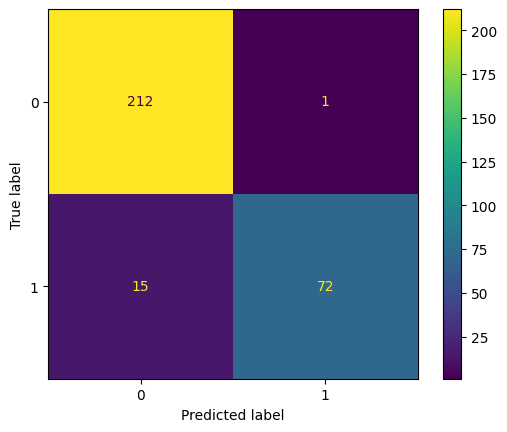

[[177  13]
 [  6 104]]


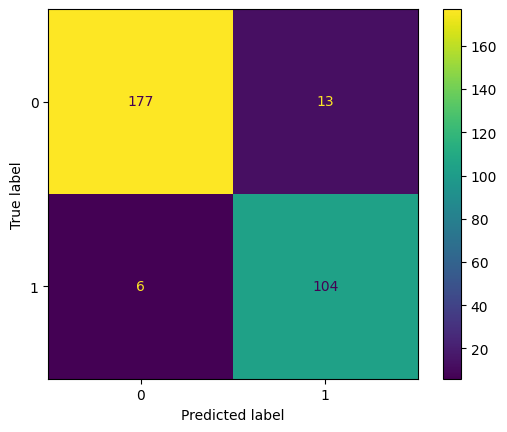

In [ ]:
for i in range(3):
  cm=confusion_matrix(y_test_vect[:,i], y_pred[:,i])
  print(cm)
  disp = metrics.ConfusionMatrixDisplay(cm)
  disp.plot()
  plt.show()

In [ ]:
print(classification_report(y_test_vect, y_pred, target_names=['x0_High', 'x0_Low', 'x0_Medium']))

              precision    recall  f1-score   support

     x0_High       0.98      1.00      0.99       103
      x0_Low       0.99      0.83      0.90        87
   x0_Medium       0.89      0.95      0.92       110

   micro avg       0.95      0.93      0.94       300
   macro avg       0.95      0.92      0.94       300
weighted avg       0.95      0.93      0.94       300
 samples avg       0.92      0.93      0.92       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusion** : We observed the best results with KNN. So we will use KNN for our future predictions

In [ ]:
def predict(x):
  x = data_normalizer.transform([x])
  y = tree_model.predict(x)
  level = y_vectorizer.inverse_transform(y)
  return level[0][0] 


In [ ]:
predicted_level = predict(data.iloc[0,2:-1])
predicted_level

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'Low'

In [ ]:
print(f'The patient has {predicted_level} level chances to have Lung cancer')

The patient has Low level chances to have Lung cancer
